# A basic notebook for collection of data on the WLN of the Photon-subtracted state

In [44]:
import matplotlib.pyplot as plt
import scipy.constants as cons
import pandas as pd
import numpy as np
import scipy
import cmath
import time
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from qutip import *

# Column Heads for data output
columns=['Wigint', 'WLN', 'SqzFactor', 'DisFactor', 'Xrange', 'Xstep', 'Yrange', 'Ystep', 'N','Time']

In [2]:
def simps2d(Xvec, Yvec, Z):
    """
    Function to return value of the 2d simpson integration over a sample of values
    :Xvec: first axis of values at which function is evaluated
    :Yvec: second axis of values at which function is evaluated
    :Z: Function values, first indice being X and second Y
    """
    return scipy.integrate.simps(scipy.integrate.simps(Z, Xvec), Yvec)
    
def myplotwigner(psi, xrange = [0,3], yrange = [-20,20], step = 0.1, title = 'Wigner Function'):
    """
    Function for plotting the Wiger function of a state which gives more control
    over the appearance of the graph than the built in qutip plot_wigner function
    """
    # Generate X and Y values from inputs
    xvec = np.arange(xrange[0], xrange[1], step)
    yvec = np.arange(yrange[0], yrange[1], step)
    X,Y = np.meshgrid(xvec, yvec)
    
    # Calculate Wigner function at specified coordinates
    W = wigner(psi, xvec, yvec)
    
    # Create Figure and Axes for the plot
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig) 
    
    # plot surface
    ax.plot_surface(X, Y, W, rcount= 50, ccount= 50, cmap=cm.jet, alpha=.8)
    
    # Overlay contours onto plot
    ax.contour(X, Y, W, 15, zdir='x', offset=xrange[1])
    ax.contour(X, Y, W, 15, zdir='y', offset=yrange[1])
    ax.contour(X, Y, W, 15,zdir='z', offset=0)
    
    # Label Axes appropriately
    ax.set_xlabel(r'$\rm{Re}(\alpha)$')
    ax.set_ylabel(r'$\rm{Im}(\alpha)$')
    ax.set_zlabel(r'$W(\alpha)$')
    
    # Add title
    plt.title(title)
    return fig, ax


In [34]:
# Name datafile for output and if not existing create and add column headings
datafile = 'photonsubbed.csv'
if not os.path.isfile(datafile):
    dfinit = pd.DataFrame(columns=columns)
    with open(datafile, 'a') as f:
        dfinit.to_csv(f, index=False)
    print('File Created')

In [4]:
# Initializing / clearing Lists to store data to be input to pandas dataframe and exported to csv, 
# d prefix to symbolize they are used for data storage
written = False
dwig = []
dWLN = []
dsqzf = []
ddisf = []
dnumlev = []
dxrange = []
dxstep = []
dyrange =  []
dystep = []
dtime = []

In [109]:
# Generate states needed to perform calculations later and also initialize variables (states need to be regenerated
# if the variables preceding them are altered)

N=180 # Number of Fock 'levels' to use in approximation

vac = basis(N, 0) # Vacuum

sqf=1 # Squeezing Factor
dif=1 # Displacement Factor

# Normalization factor
Nsub = np.sinh(sqf) ** 2 + np.abs(dif) ** 2

psisub = (1/np.sqrt(Nsub)) *  destroy(N) * displace(N,dif) * squeeze(N, sqf) * basis(N, 0) 
rhosub = ket2dm(psisub)

In [112]:
# Generate and Store a plot for the wigner function given the following ranges to determine efficient limits for 
# simpson integration
%matplotlib

xrange = [0, 3]
yrange = [-8, 8]
fig, ax = myplotwigner(rhosub, xrange, yrange)

Using matplotlib backend: TkAgg


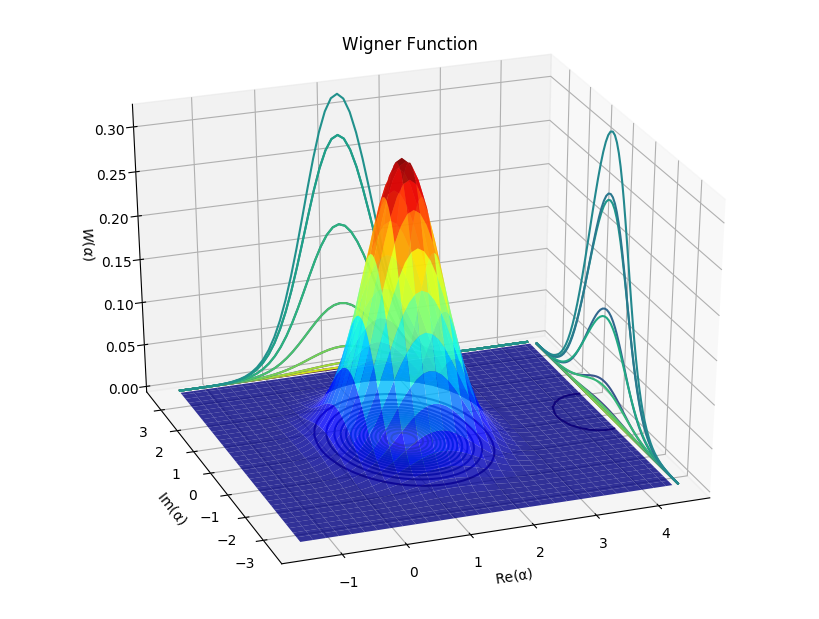

In [62]:
# Show plot again, nb. not sure how to make this interactive
%matplotlib inline
# Set View Angle
ax.view_init(30, -110)
display(fig)

In [113]:
xstep = 1/100
ystep = 5/100

starttime = time.time()

xvec = np.arange(xrange[0], xrange[1], xstep)
yvec = np.arange(yrange[0], yrange[1], ystep)
W = wigner(psisub, xvec, yvec)

endtime = time.time()

# Time taken to calculate the wigner function for the set of x and y coordinates
timetaken = endtime - starttime

In [114]:
# Calculates the integral over the Wigner function for the ranges specified above, serves as a check to see if 
# we are approximating the integration accurately enough as should be normalised to 1.
wigtemp = simps2d(xvec, yvec, W)

# Calculates the integral of the absolute value of the Wigner funtion and then takes the log (base 2) to determine
# the Wigner Logarithmic Negativity (in base 2) for the function. This serves as a monotone/quantifier for the
# quantum non-Gaussianity of the state.
WLNtemp = np.log2(simps2d(xvec, yvec, abs(W)))
print("Integral over the Wigner function = {}".format(wigtemp), "WLN = {}".format(WLNtemp))

"""
# Uncomment and then comment block below if want to look over results before appending
if written is True:
        print('Already written to file this session, try reseting data lists first to prevent writing same data  twice')
elif written is False:
    while True:
        query = input('accept results? If first value unreasonably less than 1 reject.')
         Fl = query.lower()
         if query == '' or not Fl in ['y','n','yes','no']:
            print('Please answer with yes or no!')
         else:
            break
            
    if Fl in ['yes', 'y']:  
        # Appending Values to Corresponding lists
        dsqzf.append(sqf)
        ddisf.append(dif)
        dnumlev.append(N)
        dxrange.append(xrange)
        dxstep.append(xstep)
        dyrange.append(yrange)
        dystep.append(ystep)
        dwig.append(wigtemp)
        dWLN.append(WLNtemp)
        dtime.append(time)

        print('Data appended')

    elif Fl in ['no', 'n']:
        print('Results not appended')
"""

if written is True:
    print('Already written to file this session, try reseting data lists first to prevent writing same data  twice')

elif written is False:
    # Aphhhpending Values to Corresponding lists
    dsqzf.append(sqf)
    ddisf.append(dif)
    dnumlev.append(N)
    dxrange.append(xrange)
    dxstep.append(xstep)
    dyrange.append(yrange)
    dystep.append(ystep)
    dwig.append(wigtemp)
    dWLN.append(WLNtemp)
    dtime.append(timetaken)
    
    print('Data appended')

Integral over the Wigner function = 0.9996145855794449 WLN = 0.24057753573403443
Data appended


In [115]:
data = list(zip(dwig, dWLN, dsqzf, ddisf, dxrange, dxstep, dyrange, dystep ,dnumlev, dtime))

df = pd.DataFrame(data, columns=columns)

if written is False:
    print("Data Hasn't been written to file! Don't Forget to run the final cell before leaving!!")

In [120]:
df
#Plotting to be done in seperate Notebook, likely one for all states

,Wigint,WLN,SqzFactor,DisFactor,Xrange,Xstep,Yrange,Ystep,N,Time
0,0.999948,-0.000075,0.0,1,"[-1.5, 4.5]",0.01,"[-3, 3]",0.05,100,4.273024
1,0.999831,-0.000244,0.1,1,"[-1.5, 4.5]",0.01,"[-3, 3]",0.05,100,4.212134
2,0.999903,-0.000139,0.2,1,"[-1.5, 4.5]",0.01,"[-3.5, 3.5]",0.05,120,8.242064
3,0.999399,-0.000358,0.3,1,"[-1.5, 4.5]",0.01,"[-3.5, 3.5]",0.05,120,7.771322
4,0.999476,0.006297,0.4,1,"[-1.5, 4.5]",0.01,"[-4, 4]",0.05,120,9.239460
5,0.999899,0.026980,0.5,1,"[-1.5, 4.5]",0.01,"[-5, 5]",0.05,120,10.940586
6,0.999372,0.059978,0.6,1,"[-1.5, 4.5]",0.01,"[-5, 5]",0.05,140,15.191053
7,0.999773,0.103276,0.7,1,"[-0.5, 3]",0.01,"[-6, 6]",0.05,140,10.894176
8,0.999903,0.150097,0.8,1,"[-0.5, 3]",0.01,"[-7, 7]",0.05,150,15.694458
9,0.999996,0.196870,0.9,1,"[-0.5, 3]",0.01,"[-9, 9]",0.05,150,18.911162


In [122]:
if written is True:
    print('Already written to file this session, try reseting data lists first to prevent writing same data  twice')
elif written is False:
    with open(datafile, 'a') as f:
        df.to_csv(f, header=False, index=False)
        written = True

Already written to file this session, try reseting data lists first to prevent writing same data  twice
